In [1]:
import os
import sys
import numpy as np
import pandas as pd
matplotlib.use('Agg')
%matplotlib inline
from matplotlib import pyplot as plt
import Image


rmg_path = os.getenv('RMGpy')
if rmg_path and rmg_path not in sys.path:
    sys.path.insert(1,rmg_path)

import rmgpy.kinetics
import rmgpy.reaction
from rmgpy.molecule import Molecule, Atom
from rmgpy.species import Species
from rmgpy.data.rmg import RMGDatabase 

In [2]:
mols = [
    "C8H18(2)",
    "C8H18(3)",
    "C8H18(4)",
    "C5H12O(5)",
    "C6H14O(6)",
    "C9H18(7)",
    "C6H12(8)",
    "Ocimene(9)",
    "Xylene(10)",
    "C9H18O(11)",
    "C8H16O(12)",
    "S(13)",
    "C8H18O(14)"
]

In [3]:
def evalArrhenius(autoTSTExpression):
    if autoTSTExpression is np.nan:
        return autoTSTExpression
    try:
        my_string = str(autoTSTExpression).strip("'")
        #print my_string
        result = eval(my_string, {}, {'Arrhenius': rmgpy.kinetics.Arrhenius,
                                     'MultiArrhenius': rmgpy.kinetics.MultiArrhenius,
                                     'PDepArrhenius': rmgpy.kinetics.PDepArrhenius,})
    except:
        result = autoTSTExpression
        raise
    return result

def evalReaction(reactionExpression):
    if reactionExpression is np.nan:
        return reactionExpression
    try:
        my_string = str(reactionExpression).strip("'")
        print my_string
        result = eval(my_string, {}, {'Reaction': rmgpy.reaction.Reaction,
                                     'Molecule' : rmgpy.molecule.Molecule})
    except:
        result = reactionExpression
        raise
    return result

In [4]:
directory = "./results"

filelist = []
for filename in os.listdir(directory):
    if filename.startswith("AutoTST-biofuels") and filename.endswith("combined.log"):
        filelist.append(str(directory) + '/' + str(filename))
    
        
filelist

['./results/AutoTST-biofuels..combined.log',
 './results/AutoTST-biofuels.1.combined.log',
 './results/AutoTST-biofuels.10.combined.log',
 './results/AutoTST-biofuels.11.combined.log',
 './results/AutoTST-biofuels.12.combined.log',
 './results/AutoTST-biofuels.13.combined.log',
 './results/AutoTST-biofuels.14.combined.log',
 './results/AutoTST-biofuels.15.combined.log',
 './results/AutoTST-biofuels.16.combined.log',
 './results/AutoTST-biofuels.17.combined.log',
 './results/AutoTST-biofuels.18.combined.log',
 './results/AutoTST-biofuels.19.combined.log',
 './results/AutoTST-biofuels.2.combined.log',
 './results/AutoTST-biofuels.20.combined.log',
 './results/AutoTST-biofuels.21.combined.log',
 './results/AutoTST-biofuels.22.combined.log',
 './results/AutoTST-biofuels.23.combined.log',
 './results/AutoTST-biofuels.24.combined.log',
 './results/AutoTST-biofuels.25.combined.log',
 './results/AutoTST-biofuels.26.combined.log',
 './results/AutoTST-biofuels.27.combined.log',
 './results/AutoT

In [5]:
kinDict = {}
for filename in filelist:
    f = open(filename, 'r')
    lineList = f.readlines()
    for fileline in lineList:
        if fileline.startswith("biofuelsTST.py:105"):
            splt = fileline.split(' ')
            reaction = splt[-1]
            reaction = reaction[:-1]
            #print reaction
            #print

        if fileline.startswith('Yay,'):
            lastline = lineList[len(lineList)-1]
            splt = lastline.split('kinetics ')
            kinetics = splt[-1]
            kinetics = evalArrhenius(kinetics[:-1])
            #print type(kinetics)
            #print

            #print kinetics
            kinDict[reaction] = kinetics

kinDict

{'OO(15)+C6H13O(46)=C6H14O(6)+OOH(1)': Arrhenius(A=(0.000313006,'cm^3/(mol*s)'), n=4.43765, Ea=(-6.05793,'kJ/mol'), T0=(1,'K'), Tmin=(303.03,'K'), Tmax=(2500,'K'), comment="""Fitted to 59 data points; dA = *|/ 1.07692, dn = +|- 0.00972598, dEa = +|- 0.0535027 kJ/mol""")}

In [6]:
df = pd.DataFrame(kinDict.items(), columns=['Reaction', 'Kinetics'])
df

,Reaction,Kinetics
0,OO(15)+C6H13O(46)=C6H14O(6)+OOH(1),"Arrhenius(A=(0.000313006,'cm^3/(mol*s)'), n=4...."


In [7]:
ln_A = []
E_a = []
kin = {}
inverseTemps = np.linspace(1000./800., 1000/2500., 15)
Temps = 1000./inverseTemps
comparisonPressure = 1e5

In [8]:
for i in range(len(df['Kinetics'])):
    kinetics = df['Kinetics'].iloc[i]
    reaction = df['Reaction'].iloc[i]

    kinList = []
    for Temp in Temps:
        kinList.append(np.log10(kinetics.getRateCoefficient(T=Temp, P=comparisonPressure)))
    kin[reaction] = kinList
    A = float(str(kinetics.A).split(' ')[0])
    #print A
    ln_A.append(np.log10(A))

    Ea = float(str(kinetics.Ea).split(' ')[0])
    #print Ea
    E_a.append(Ea)

ln_A = np.array(ln_A)
E_a = np.array(E_a)

print ln_A, E_a
print kin

[-3.50444734] [-6.05793]
{'OO(15)+C6H13O(46)=C6H14O(6)+OOH(1)': [3.7739840149850354, 3.8507312642699567, 3.9325078800009581, 4.0198703584078537, 4.1134729968355872, 4.2140922449865661, 4.3226591411370237, 4.4403032850803488, 4.5684136514389273, 4.708724629309212, 4.8634409906567599, 5.0354250453384637, 5.2284872626431209, 5.4478576302987074, 5.7009920449990785]}


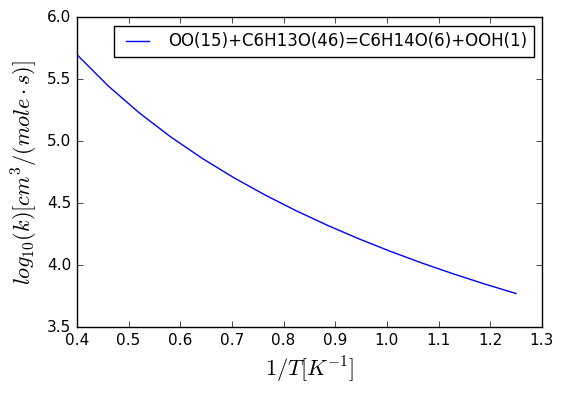

'for i in range(len(kin.keys())):\n    rates = kin.values()[i]\n    reaction = kin.keys()[i]\n    fig, ax = plt.subplots()\n    plt.plot(inverseTemps, rates, label=str(reaction))\n    plt.xlabel("$1/T [K^{-1}]$", fontsize=16)\n    plt.ylabel("$log_{10}(k) [cm^3 / (mole \\cdot s)]$", fontsize=16)\n    \n    Tticks = [800, 1000, 1500, 2500]\n    ax.set_xticks([1000./T for T in Tticks])\n    ax.set_xticklabels([\'1/{:.0f}\'.format(T) for T in Tticks])\n    plt.tick_params(axis=\'x\', labelsize=11)\n    plt.tick_params(axis=\'y\', labelsize=11)\n    plt.legend()\n    '

In [17]:
# for reactions split up by different starting species
for mol in mols:
    for i in range(len(kin.keys())):
        fig, ax = plt.subplots()
        plt.clf()
        if mol in kin.keys()[i]:
            rates = kin.values()[i]
            reaction = kin.keys()[i]
            
            plt.plot(inverseTemps, rates, label=str(reaction))
            plt.xlabel("$1/T [K^{-1}]$", fontsize=16)
            plt.ylabel("$log_{10}(k) [cm^3 / (mole \cdot s)]$", fontsize=16)

            Tticks = [800, 1000, 1500, 2500]
            ax.set_xticks([1000./T for T in Tticks])
            ax.set_xticklabels(['1/{:.0f}'.format(T) for T in Tticks])
            plt.tick_params(axis='x', labelsize=11)
            plt.tick_params(axis='y', labelsize=11)
            plt.legend()
            plt.show()
            #fig.savefig(str(mol)+'.pdf')
            
    
# all reactions
for i in range(len(kin.keys())):
    rates = kin.values()[i]
    reaction = kin.keys()[i]
    fig, ax = plt.subplots()
    plt.plot(inverseTemps, rates, label=str(reaction))
    plt.xlabel("$1/T [K^{-1}]$", fontsize=16)
    plt.ylabel("$log_{10}(k) [cm^3 / (mole \cdot s)]$", fontsize=16)
    
    Tticks = [800, 1000, 1500, 2500]
    ax.set_xticks([1000./T for T in Tticks])
    ax.set_xticklabels(['1/{:.0f}'.format(T) for T in Tticks])
    plt.tick_params(axis='x', labelsize=11)
    plt.tick_params(axis='y', labelsize=11)
    #plt.legend()
    #fig.savefig('combined.pdf')
    

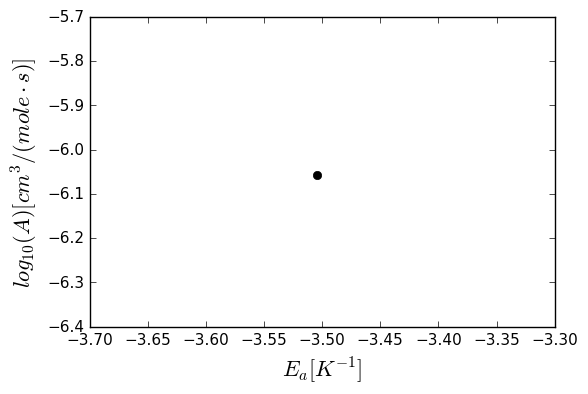

In [10]:
fig, ax = plt.subplots()
plt.plot(ln_A, E_a, 'ok', label=str(reaction))
plt.xlabel("$E_a [K^{-1}]$", fontsize=16)
plt.ylabel("$log_{10}(A) [cm^3 / (mole \cdot s)]$", fontsize=16)


plt.tick_params(axis='x', labelsize=11)
plt.tick_params(axis='y', labelsize=11)
#plt.legend()
#fig.savefig("ln_AvsE_a.pdf")

In [11]:
image_directory = "./species/"

imagelist = []
for filename in os.listdir(image_directory):
    imagelist.append(image_directory + filename)

In [12]:
for i in range(len(kin.keys())):
    rates = kin.values()[i]
    reaction = kin.keys()[i]
    left, right = reaction.split('=')

    if "OOH" in left:
        print left
        a,b = left.split('+')
        if "OOH" not in a:
            species = b
            print a
        else:
            species = a
            print b
    else:
        print right
        a,b = right.split('+')
        if "OOH" not in a:
            species = a
            print a
        else:
            species = b
            print b
    identifier, number = species.split('(')
    number = '(' + number 
    for image in imagelist:
        if number in image:
            print image
            #myImage = Image.open(image)

#myImage

C6H14O(6)+OOH(1)
C6H14O(6)
./species/2-Methyl-1-pentanol(6).png


<PngImagePlugin.PngImageFile image mode=RGB size=78x60 at 0x1130413B0>

left

In [13]:
#myImage

<PngImagePlugin.PngImageFile image mode=RGB size=78x60 at 0x1130413B0>

In [14]:
#imagelist

['./species/2,2,4-Trimethylpentane(2).png',
 './species/2,3-di-tert-butoxypropanol(13).png',
 './species/2,4-dimethyl-2-heptene(7).png',
 './species/2,4-Dimethylhexane(3).png',
 './species/2-(1-ethylpropoxy)-propane(14).png',
 './species/2-methyl 2-butanol(5).png',
 './species/2-Methyl-1-pentanol(6).png',
 './species/3-Methylheptane(4).png',
 './species/[CH2]C(=C)CCC=C(C)C=C(60).png',
 './species/[CH2]C(=O)C(C)CC(C)C(76).png',
 './species/[CH2]C(C)(C)CC(C)C(19).png',
 './species/[CH2]C(C)(C)OC(CO)COC(C)(C)C(81).png',
 './species/[CH2]C(C)(C)OCC(CO)OC(C)(C)C(80).png',
 './species/[CH2]C(C)(O)CC(37).png',
 './species/[CH2]C(C)=CC(C)CCC(52).png',
 './species/[CH2]C(C)CC(=O)CC(C)C(70).png',
 './species/[CH2]C(C)CC(C)(C)C(20).png',
 './species/[CH2]C(C)CC(C)C(C)=O(74).png',
 './species/[CH2]C(C)CC(C)CC(25).png',
 './species/[CH2]C(C)OC(CC)CC(86).png',
 './species/[CH2]C(C=C(C)C)CCC(50).png',
 './species/[CH2]C(C=C)=CCCC(=C)C(61).png',
 './species/[CH2]C(CC(C)C)C(C)=O(75).png',
 './species/[